### Descripcón:

La finalidad de este notebook es realizar una visualización de los datos utilizando gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [4]:
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/dataset_con_atrib.csv')

In [3]:
df

,url,type,longitud_url,longitud_hostname,longitud_de_ruta,longitud_de_consulta,contiene_https,contiene_ip,contiene_php,contiene_html,contiene_doble_barras,profundidad_de_la_ruta,acortadores_de_url,num_digitos,num_caracteres_especiales,dom_dias_activo,dom_dias_hasta_expiracion,entropia
0,http://www.osn-solutions.nl/index.php/nl/over-osn,defacement,49,20,22,0,0,0,1,0,0,3,0,0,8,0,-1,4.012598
1,http://msb.jcw.mybluehost.me/web.html,phishing,37,21,9,0,0,0,0,1,0,1,0,0,5,2803,118,3.884601
2,https://sites.google.com/view/qwzxvcax/home,phishing,43,16,19,0,1,0,0,0,0,3,0,0,5,9764,1557,4.144418
3,https://pub-fc6dc735ff68445cae5ca2d946a8bfbb.r...,phishing,61,43,10,0,1,0,0,1,0,1,0,16,5,655,440,4.716982
4,https://tinyurl.com/4vz6vmm2/a.html?syl=1x165b...,phishing,125,11,16,89,1,0,0,1,0,2,1,32,11,8169,1692,5.429293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,https://mitsui-jyuku.mixh.jp/uploads/3601q2w3e...,malware,56,20,28,0,1,0,0,0,0,2,0,9,6,2143,51,4.663800
19996,http://www.pubyun.com/wiki/lib/exe/css.php?t=d...,malware,92,14,21,49,0,0,1,0,0,4,0,20,10,4477,270,4.889021
19997,https://bt-mail-service-f245c0.webflow.io/,phishing,42,33,1,0,1,0,0,0,0,0,0,4,6,4050,1428,4.445307
19998,http://111.43.223.83:56977/Mozi.m,malware,33,13,7,0,0,1,0,0,0,1,0,15,6,0,-1,4.127283


El conjunto de datos creado tiene 20000 muestras de url y 16 atributos asociadas a ella que se han extraido de los pasos previos, además todas las columnas son del tipo númerico

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        20000 non-null  object 
 1   type                       20000 non-null  object 
 2   longitud_url               20000 non-null  int64  
 3   longitud_hostname          20000 non-null  int64  
 4   longitud_de_ruta           20000 non-null  int64  
 5   longitud_de_consulta       20000 non-null  int64  
 6   contiene_https             20000 non-null  int64  
 7   contiene_ip                20000 non-null  int64  
 8   contiene_php               20000 non-null  int64  
 9   contiene_html              20000 non-null  int64  
 10  contiene_doble_barras      20000 non-null  int64  
 11  profundidad_de_la_ruta     20000 non-null  int64  
 12  acortadores_de_url         20000 non-null  int64  
 13  num_digitos                20000 non-null  int

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitud_url,20000.0,60.996050,43.717901,9.000000,33.000000,48.00000,80.000000,1334.000000
longitud_hostname,20000.0,19.359950,10.037850,0.000000,14.000000,17.00000,22.000000,102.000000
longitud_de_ruta,20000.0,21.038100,25.404754,0.000000,1.000000,11.00000,28.000000,654.000000
longitud_de_consulta,20000.0,12.787850,35.664685,0.000000,0.000000,0.00000,0.000000,1241.000000
contiene_https,20000.0,0.274700,0.446374,0.000000,0.000000,0.00000,1.000000,1.000000
contiene_ip,20000.0,0.092950,0.290370,0.000000,0.000000,0.00000,0.000000,1.000000
contiene_php,20000.0,0.161900,0.368368,0.000000,0.000000,0.00000,0.000000,1.000000
contiene_html,20000.0,0.141800,0.348854,0.000000,0.000000,0.00000,0.000000,1.000000
contiene_doble_barras,20000.0,0.004450,0.066561,0.000000,0.000000,0.00000,0.000000,1.000000
profundidad_de_la_ruta,20000.0,1.571900,1.456275,0.000000,0.000000,1.00000,2.000000,11.000000


De las estadisticas anteriores se puede observar que las muestras de url tienen una media de 3742 dias activos, aproximadamente 10 años, la media para la expiración de los dominios se situan entorno al año. En cuanto a protocolos https observando los percentiles indica que la mayoria de las url no tienen el protocolo. De media las muestras de url tienen una longitud de 61 caracteres, con una media de 6 digtios y 8 caracteres especiales en ellas.

Otra observaciones que se puede sacar de las estadisticas anteriores, **valores atipicos** u otliers. La columna de longitud_url
tiene un valor máximo de 1334 caracteres. Sin embargo no parece un error puesto que se trata de una url phishing sacado
de la base de datos de Phishtank. Las url sacada de Phishtank están verificadas y además se encuentran activo. Con todo lo anterior se opta por mantener este valor atipico, pues puede ser una caracteristica que proporcione informacion relevante al modelo. Esto se puede extender hacia otras columnas como longitud_hostname, longitud_de_ruta, longitud_de_consulta entre otras.

En relación a los dias activos y dias hasta expiracion, se opta tambien por mantener esos valores atipicos, puesto que el valor más alto de dias_activo se encuentra en una url legitima. Y dias hasta expiracion el valor más alto se encuentra en una url maliciosa que ha devuelto su consulta en la base de datos de whois.

En resumen, si bien es cierto que hay valores atipicos en el conjunto de datos se optan por mantenerlos puesto que tiene coherencia en el estudio y los valores no son errores.

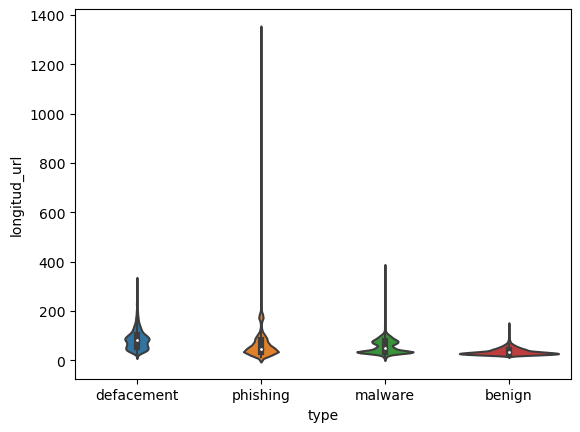

In [7]:
sns.violinplot(x='type', y='longitud_url', data=df)
plt.show()

In [8]:
df.loc[df['longitud_url'].idxmax()]

url                          https://cloudflare-ipfs.com/ipfs/bafybeiadxcgf...
type                                                                  phishing
longitud_url                                                              1334
longitud_hostname                                                           19
longitud_de_ruta                                                            65
longitud_de_consulta                                                      1241
contiene_https                                                               1
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        1
profundidad_de_la_ruta                                                       2
acortadores_de_url                                  

In [5]:
df.loc[df['longitud_de_consulta'].idxmax()]

url                          https://cloudflare-ipfs.com/ipfs/bafybeiadxcgf...
type                                                                  phishing
longitud_url                                                              1334
longitud_hostname                                                           19
longitud_de_ruta                                                            65
longitud_de_consulta                                                      1241
contiene_https                                                               1
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        1
profundidad_de_la_ruta                                                       2
acortadores_de_url                                  

In [9]:
df.loc[df['longitud_de_ruta'].idxmax()]

url                          https://8307999.fls.doubleclick.net/activityi;...
type                                                                  phishing
longitud_url                                                               934
longitud_hostname                                                           27
longitud_de_ruta                                                           654
longitud_de_consulta                                                       244
contiene_https                                                               1
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        0
profundidad_de_la_ruta                                                      11
acortadores_de_url                                  

In [10]:
df.loc[df['longitud_hostname'].idxmax()]

url                          http://paypal.com-cgi-bin.webscr.cmd-secure-lo...
type                                                                  phishing
longitud_url                                                               110
longitud_hostname                                                          102
longitud_de_ruta                                                             1
longitud_de_consulta                                                         0
contiene_https                                                               0
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        0
profundidad_de_la_ruta                                                       0
acortadores_de_url                                  

In [5]:
df.loc[df['num_digitos'].idxmax()]

url                          https://8307999.fls.doubleclick.net/activityi;...
type                                                                  phishing
longitud_url                                                               934
longitud_hostname                                                           27
longitud_de_ruta                                                           654
longitud_de_consulta                                                       244
contiene_https                                                               1
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        0
profundidad_de_la_ruta                                                      11
acortadores_de_url                                  

In [7]:
df.loc[df['num_caracteres_especiales'].idxmax()]

url                          https://8307999.fls.doubleclick.net/activityi;...
type                                                                  phishing
longitud_url                                                               934
longitud_hostname                                                           27
longitud_de_ruta                                                           654
longitud_de_consulta                                                       244
contiene_https                                                               1
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        0
profundidad_de_la_ruta                                                      11
acortadores_de_url                                  

In [6]:
df.loc[df['profundidad_de_la_ruta'].idxmax()]

url                          https://8307999.fls.doubleclick.net/activityi;...
type                                                                  phishing
longitud_url                                                               934
longitud_hostname                                                           27
longitud_de_ruta                                                           654
longitud_de_consulta                                                       244
contiene_https                                                               1
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        0
profundidad_de_la_ruta                                                      11
acortadores_de_url                                  

In [12]:
df.loc[df['dom_dias_activo'].idxmax()]

url                          http://www.cs.cmu.edu/~anupamg/
type                                                  benign
longitud_url                                              31
longitud_hostname                                         14
longitud_de_ruta                                          10
longitud_de_consulta                                       0
contiene_https                                             0
contiene_ip                                                0
contiene_php                                               0
contiene_html                                              0
contiene_doble_barras                                      0
profundidad_de_la_ruta                                     2
acortadores_de_url                                         0
num_digitos                                                0
num_caracteres_especiales                                  6
dom_dias_activo                                        14291
dom_dias_hasta_expiracio

In [13]:
df.loc[df['dom_dias_hasta_expiracion'].idxmax()]

url                          https://api.weibo.com/oauth2/authorize?client_...
type                                                                   malware
longitud_url                                                               161
longitud_hostname                                                           13
longitud_de_ruta                                                            17
longitud_de_consulta                                                       122
contiene_https                                                               1
contiene_ip                                                                  0
contiene_php                                                                 0
contiene_html                                                                0
contiene_doble_barras                                                        0
profundidad_de_la_ruta                                                       2
acortadores_de_url                                  

### Verificacion de valores duplicados

En la exploración se ha observado que hay url repetidos, al ser relativamente pocos, 866 muestras, se ha optado por quitarlas. Tras la eliminación de duplicado se quedan en 20000 - 866 = 19134 muestras

In [14]:
df['url'].duplicated().sum()

866

In [15]:
df.loc[df['url'].duplicated(), :]

,url,type,longitud_url,longitud_hostname,longitud_de_ruta,longitud_de_consulta,contiene_https,contiene_ip,contiene_php,contiene_html,contiene_doble_barras,profundidad_de_la_ruta,acortadores_de_url,num_digitos,num_caracteres_especiales,dom_dias_activo,dom_dias_hasta_expiracion,entropia
360,http://bjpgqsc.com/cp/class/?0.html&page=3&sho...,malware,64,11,10,35,0,0,0,0,0,3,0,2,13,1120,340,4.399397
379,http://videoporn24.ru/skins/01/js/prettyPhoto/...,malware,65,14,44,0,0,0,0,0,0,6,0,4,8,0,-1,4.165890
520,http://9779.info/%E5%88%A9%E7%94%A8%E5%AD%A6%E...,malware,99,9,83,0,0,0,0,0,0,2,0,29,30,5101,12,3.768740
602,http://www.xpj5988.com/pages/novice/register.h...,malware,92,15,26,0,0,0,0,0,0,3,0,26,7,3506,511,5.003045
777,http://www.3344mt.com/cl/tpl/montecarlo/ver1/c...,malware,74,14,42,10,0,0,0,0,0,6,1,9,11,0,-1,4.332509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,http://9779.info/%E5%88%9D%E4%B8%80%E7%BE%8E%E...,malware,63,9,47,0,0,0,0,0,0,2,0,19,18,5101,12,3.922135
19963,http://bsjgroupco.com/index.html,defacement,32,14,11,0,0,0,0,1,0,1,0,0,3,5831,12,4.241729
19966,http://hotlinegsm.com/products/mobile-and-tabl...,malware,82,14,61,0,0,0,0,0,0,3,0,0,11,1575,251,4.298784
19975,http://www.thenathanbaker.com/thenathanbaker.c...,malware,105,22,66,9,0,0,0,0,0,6,0,3,14,5941,267,4.332463


In [16]:
df.drop_duplicates('url', keep='first', inplace=True)

In [17]:
print(f"Dataframe tras la eliminación de duplicados: {len(df)}")

Dataframe tras la eliminación de duplicados: 19134


In [18]:
print(f"Verificación nuevamente de duplicados en la columna url: {df['url'].duplicated().sum()} valores duplicados")

Verificación nuevamente de duplicados en la columna url: 0 valores duplicados


In [19]:
df['type'].value_counts()

phishing      5000
benign        5000
defacement    4992
malware       4142
Name: type, dtype: int64

In [20]:
print("Las url duplicadas provenia del subconjunto de malware y defacement")

Las url duplicadas provenia del subconjunto de malware y defacement


### Verificacion de valores nulos y valores infinitos

In [21]:
df.isna().sum()

url                          0
type                         0
longitud_url                 0
longitud_hostname            0
longitud_de_ruta             0
longitud_de_consulta         0
contiene_https               0
contiene_ip                  0
contiene_php                 0
contiene_html                0
contiene_doble_barras        0
profundidad_de_la_ruta       0
acortadores_de_url           0
num_digitos                  0
num_caracteres_especiales    0
dom_dias_activo              0
dom_dias_hasta_expiracion    0
entropia                     0
dtype: int64

In [22]:
df.isin([np.inf, -np.inf]).sum()

url                          0
type                         0
longitud_url                 0
longitud_hostname            0
longitud_de_ruta             0
longitud_de_consulta         0
contiene_https               0
contiene_ip                  0
contiene_php                 0
contiene_html                0
contiene_doble_barras        0
profundidad_de_la_ruta       0
acortadores_de_url           0
num_digitos                  0
num_caracteres_especiales    0
dom_dias_activo              0
dom_dias_hasta_expiracion    0
entropia                     0
dtype: int64

### Exploración de datos

In [23]:
df['type'].value_counts()

phishing      5000
benign        5000
defacement    4992
malware       4142
Name: type, dtype: int64

In [24]:
phish = df[df['type'] == 'phishing']
malware = df[df['type'] == 'malware']
deface = df[df['type'] == 'defacement']
benign = df[df['type'] == 'benign']

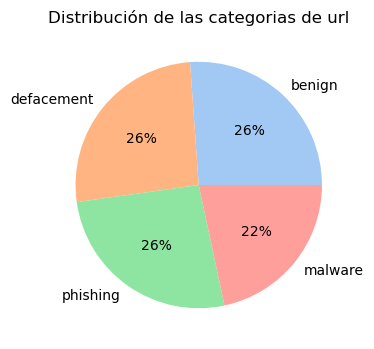

In [25]:
labels = ['benign', 'defacement', 'phishing', 'malware']
datos = [len(benign), len(deface), len(phish), len(malware)]

# grafico de tartas
plt.figure(figsize=(4,4))
plt.pie(datos, labels=labels, autopct='%.0f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución de las categorias de url')
plt.show()

### Nube de palabras

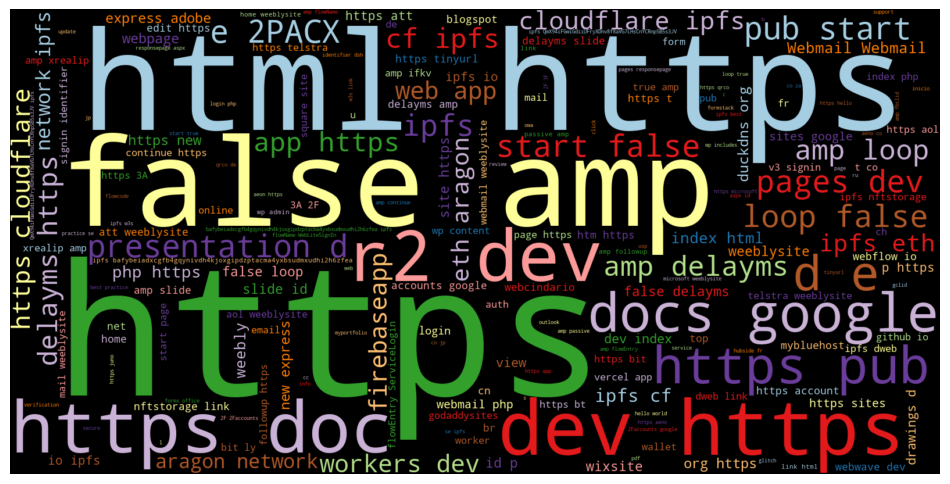

In [26]:
palabras = ' '.join(palabra for palabra in phish['url']) # Crear string de palabras
nube = WordCloud(width=1600, height=800, colormap='Paired_r').generate(palabras) # Crear la nube de palabras usando las palabras de la url
plt.figure(figsize=(12,14))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

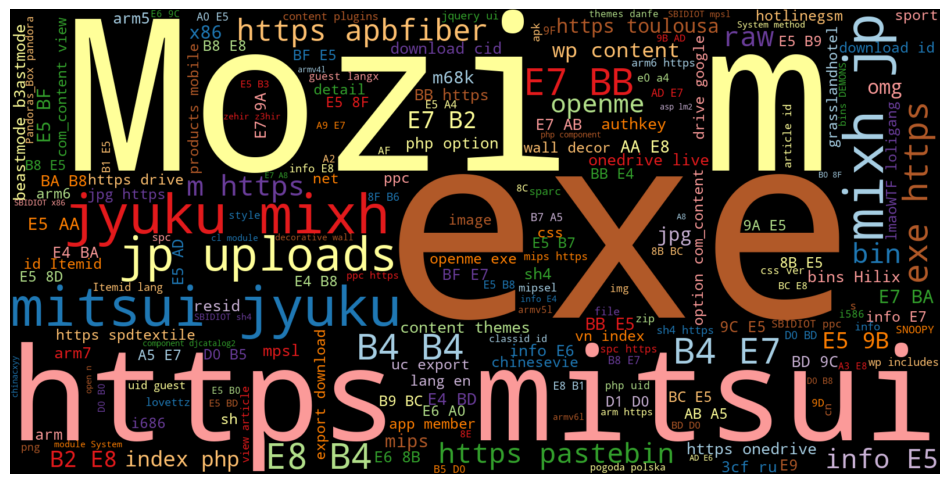

In [27]:
palabras = ' '.join(palabra for palabra in malware['url'])
nube = WordCloud(width=1600, height=800, colormap='Paired_r').generate(palabras)
plt.figure(figsize=(12,14))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

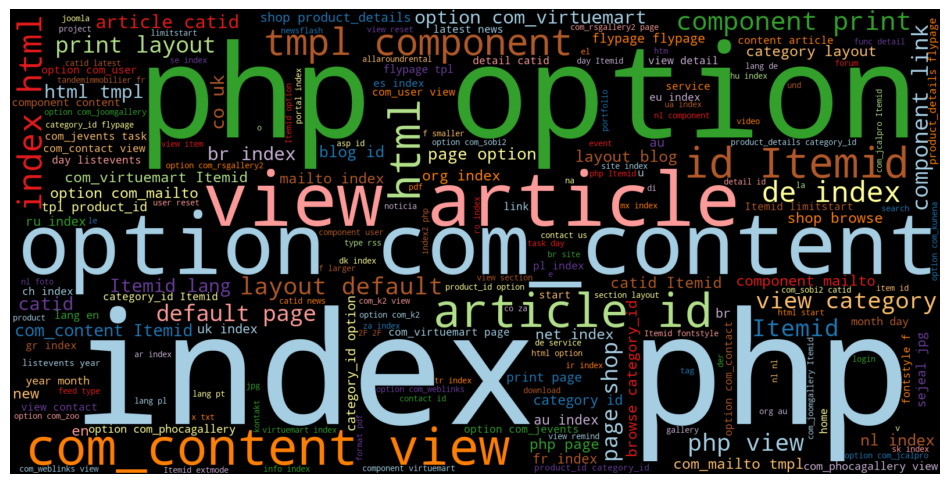

In [28]:
palabras = ' '.join(palabra for palabra in deface['url'])
nube = WordCloud(width=1600, height=800, colormap='Paired_r').generate(palabras)
plt.figure(figsize=(12,14))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

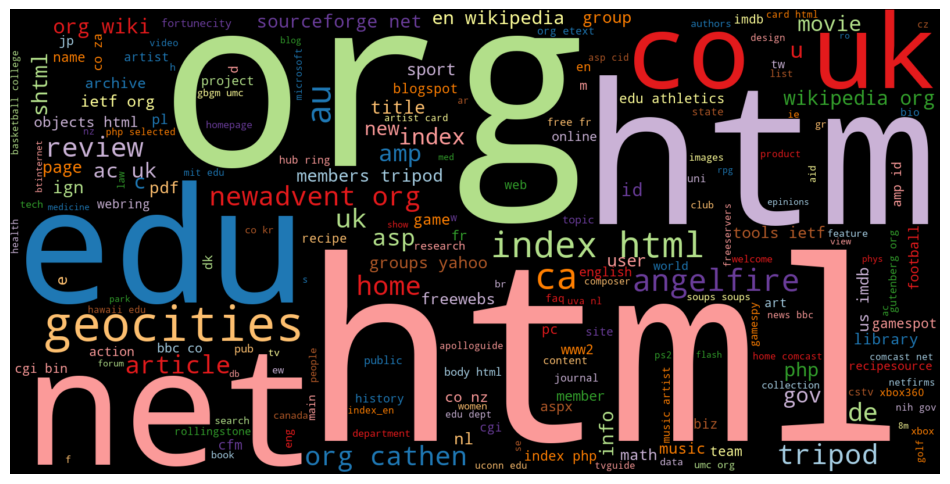

In [29]:
palabras = ' '.join(palabra for palabra in benign['url'])
nube = WordCloud(width=1600, height=800, colormap='Paired_r').generate(palabras)
plt.figure(figsize=(12,14))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

### Gráficos de barras

In [30]:
atrib_num = ['longitud_url', 'longitud_hostname', 'longitud_de_ruta',
       'longitud_de_consulta', 'profundidad_de_la_ruta', 'num_digitos', 
        'num_caracteres_especiales', 'dom_dias_activo', 'dom_dias_hasta_expiracion', 
        'entropia']

In [31]:
d_agrupados = df.groupby('type')[atrib_num].mean().reset_index()

In [32]:
d_agrupados.round()

,type,longitud_url,longitud_hostname,longitud_de_ruta,longitud_de_consulta,profundidad_de_la_ruta,num_digitos,num_caracteres_especiales,dom_dias_activo,dom_dias_hasta_expiracion,entropia
0,benign,36.0,19.0,9.0,1.0,1.0,1.0,4.0,7237.0,418.0,4.0
1,defacement,86.0,19.0,23.0,36.0,2.0,5.0,11.0,2499.0,152.0,4.0
2,malware,52.0,14.0,25.0,4.0,2.0,12.0,8.0,2026.0,204.0,4.0
3,phishing,66.0,26.0,22.0,9.0,1.0,7.0,6.0,2877.0,666.0,4.0


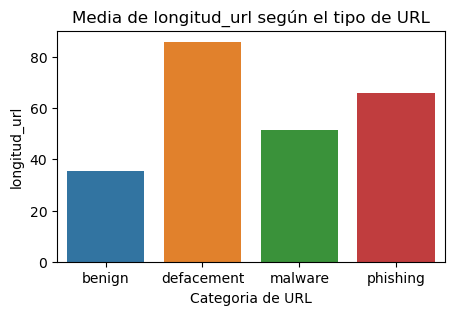

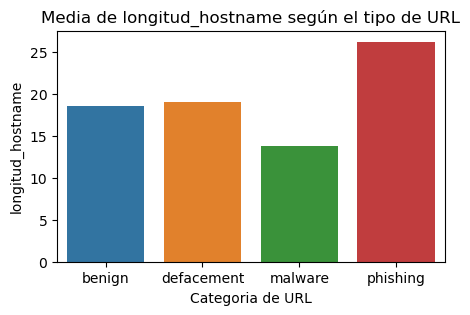

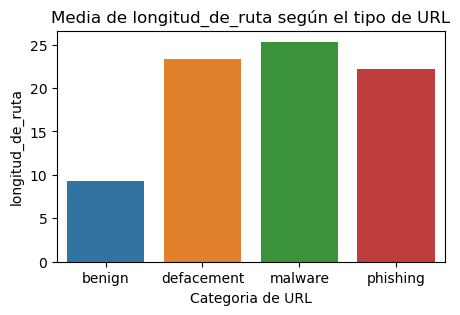

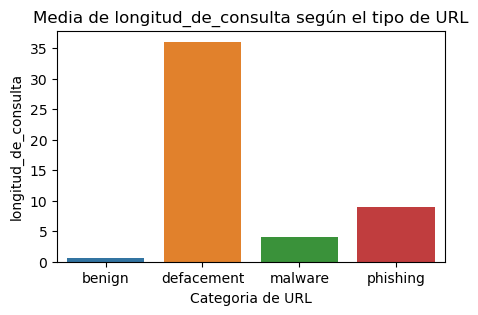

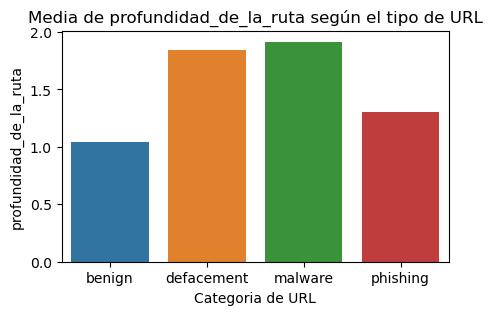

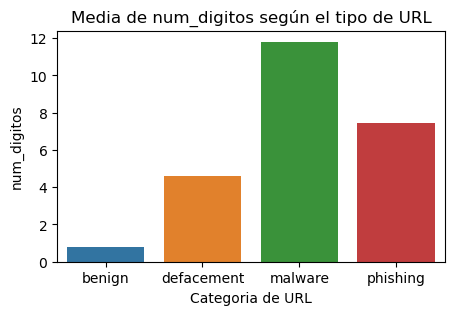

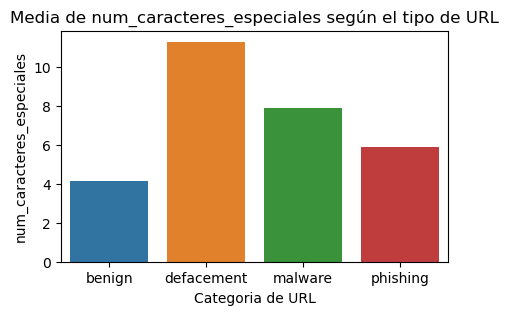

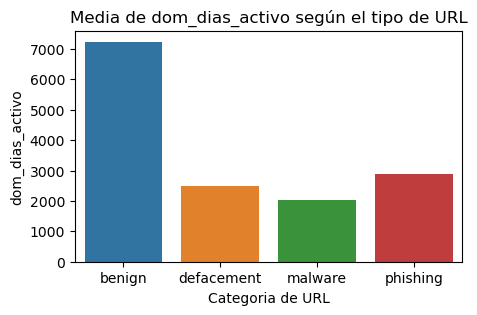

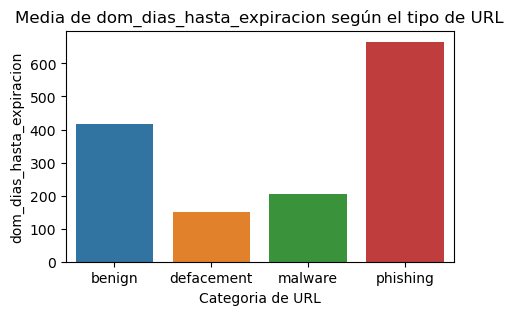

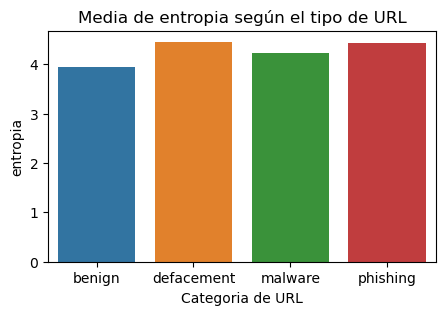

In [50]:
for atrib in atrib_num:
    plt.figure(figsize=(5,3))
    sns.barplot(x='type', y=atrib, data=d_agrupados)
    plt.title(f'Media de {atrib} según el tipo de URL')
    plt.xlabel('Categoria de URL')
    plt.ylabel(atrib)
    plt.show()

### Histogramas

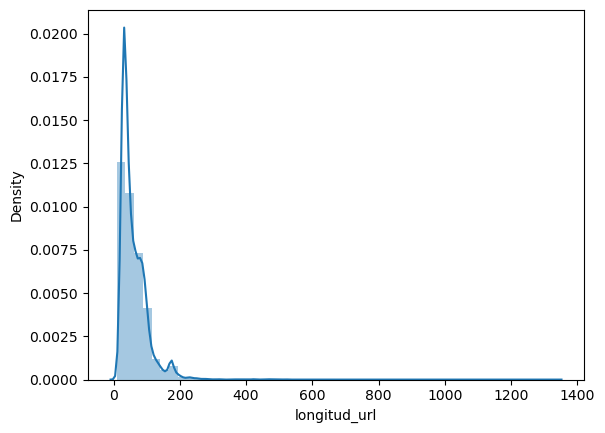

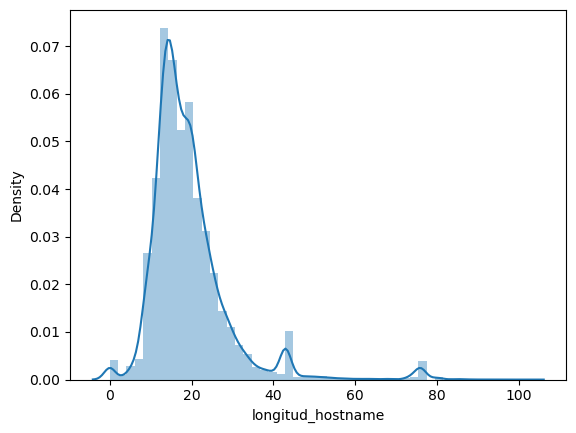

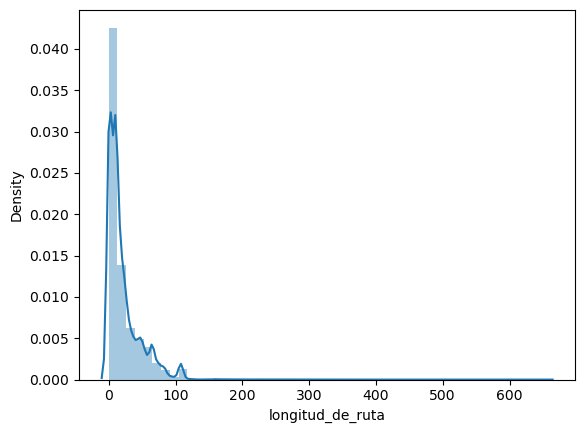

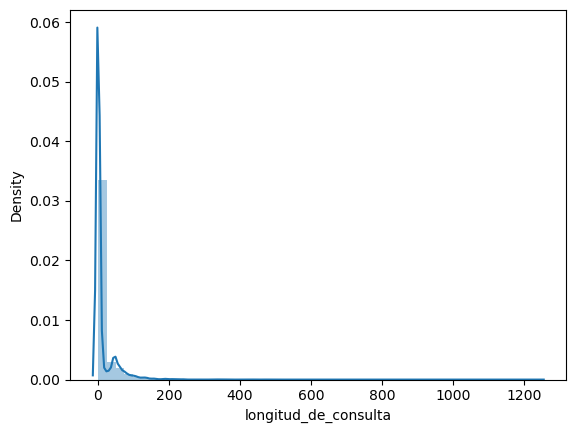

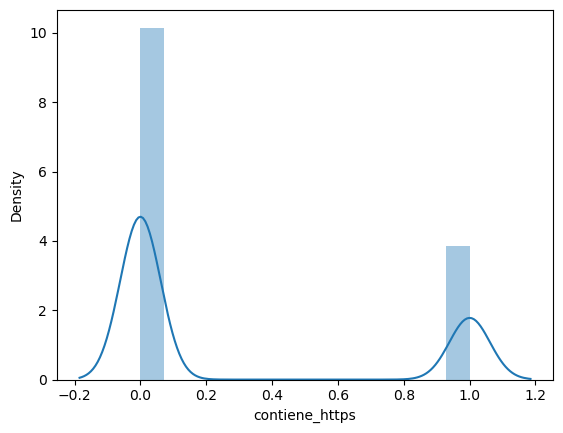

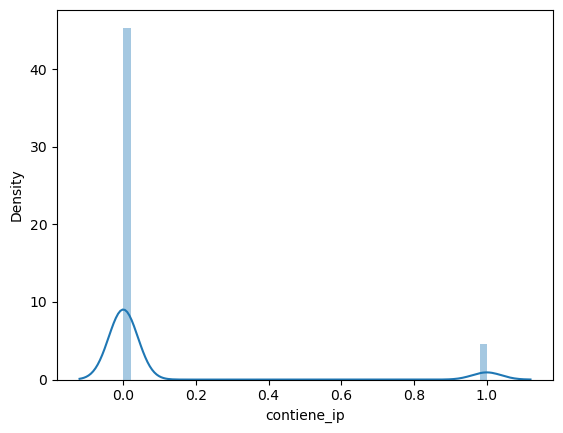

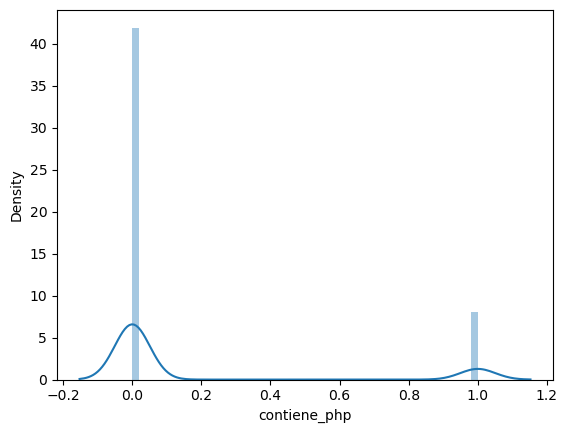

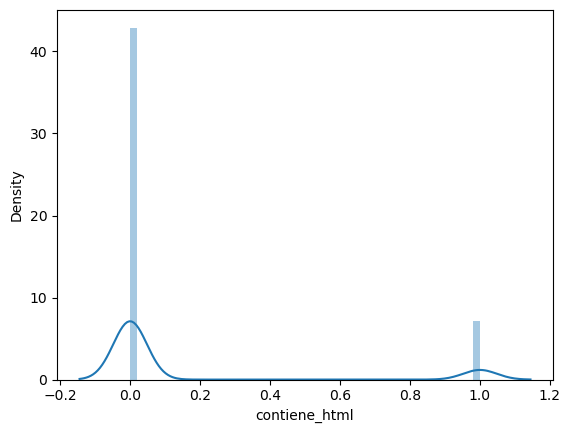

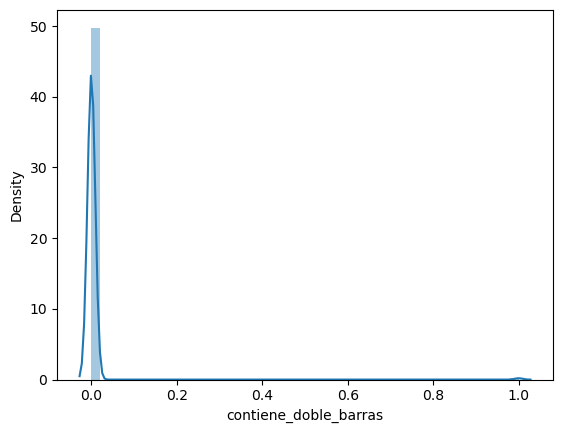

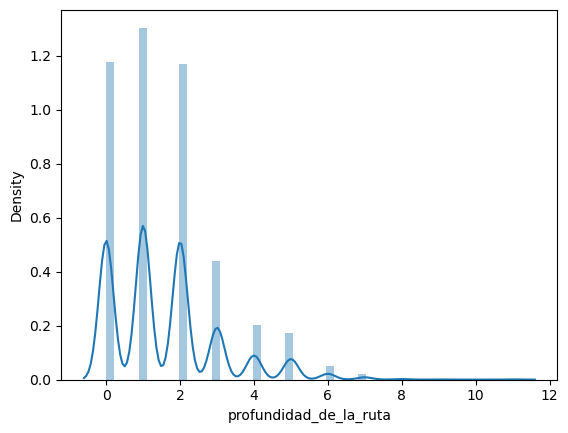

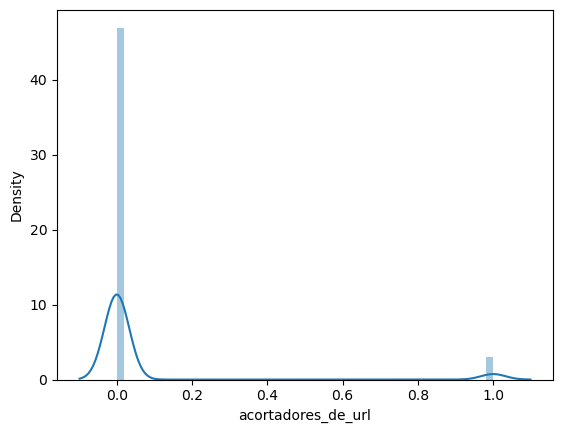

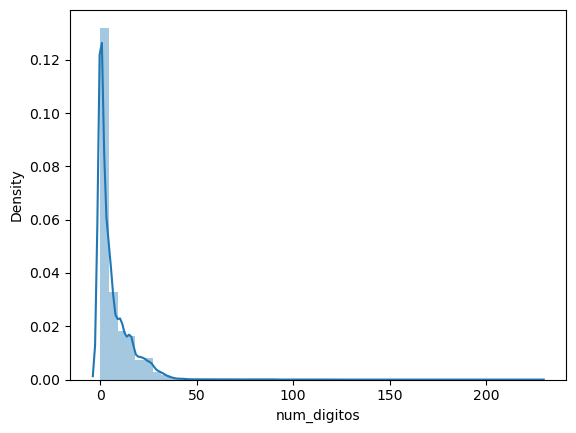

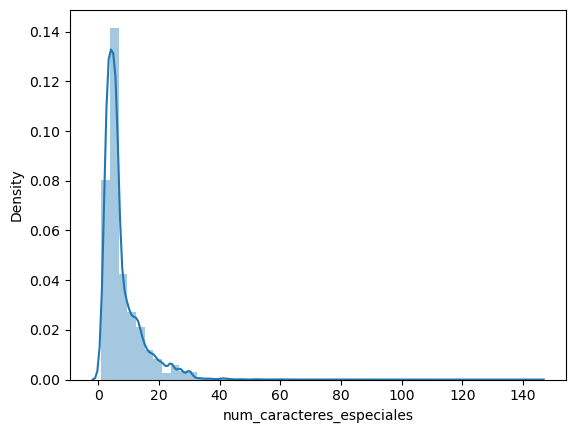

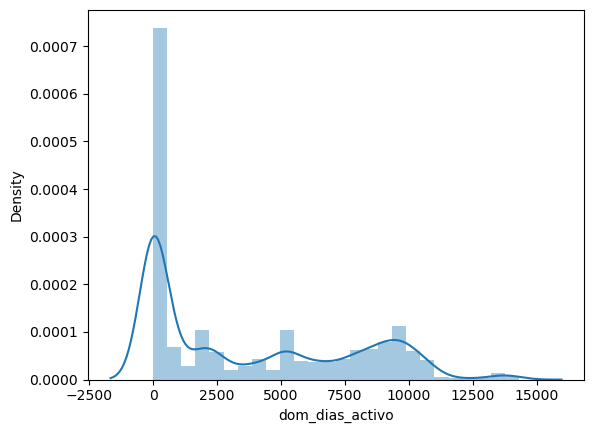

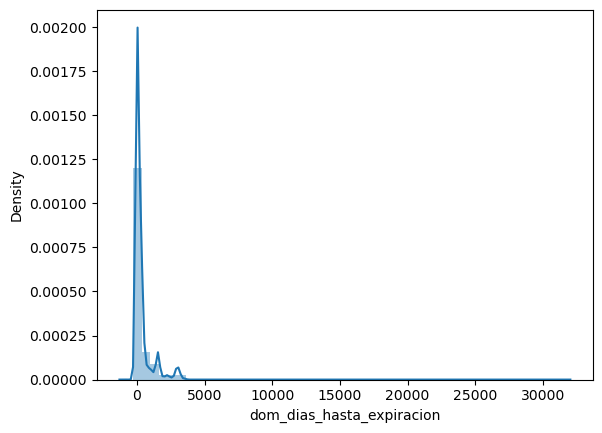

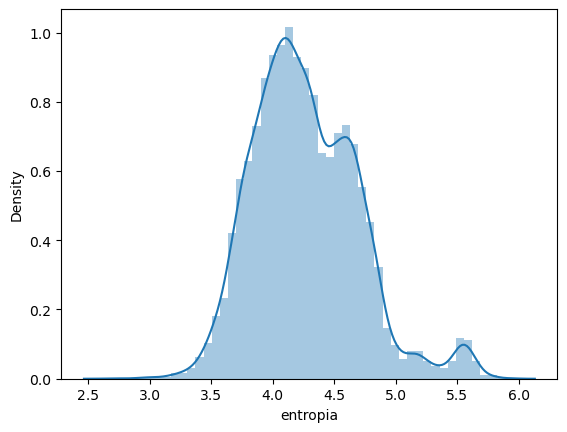

In [5]:
df_copy = df.copy()

df_copy = df_copy.drop(['url', 'type'], axis=1)

import warnings
warnings.filterwarnings('ignore')

for col in df_copy.columns:
    plt.figure()
    sns.distplot(df[col])

### Mapa de correlaciones

In [5]:
df_copy = df.copy()

In [6]:
df_copy['categorias'] = df_copy['type'].replace(['benign', 'phishing', 'defacement', 'malware'], [0, 1, 2, 3])

In [7]:
df_copy.corr()['categorias'].sort_values(ascending=False)

categorias                   1.000000
contiene_ip                  0.419317
num_digitos                  0.386181
num_caracteres_especiales    0.358103
profundidad_de_la_ruta       0.282841
longitud_de_ruta             0.269383
entropia                     0.215966
longitud_url                 0.213120
contiene_php                 0.202385
longitud_de_consulta         0.128938
contiene_doble_barras       -0.002352
acortadores_de_url          -0.041688
contiene_html               -0.071150
contiene_https              -0.071235
dom_dias_hasta_expiracion   -0.162972
longitud_hostname           -0.244242
dom_dias_activo             -0.417408
Name: categorias, dtype: float64

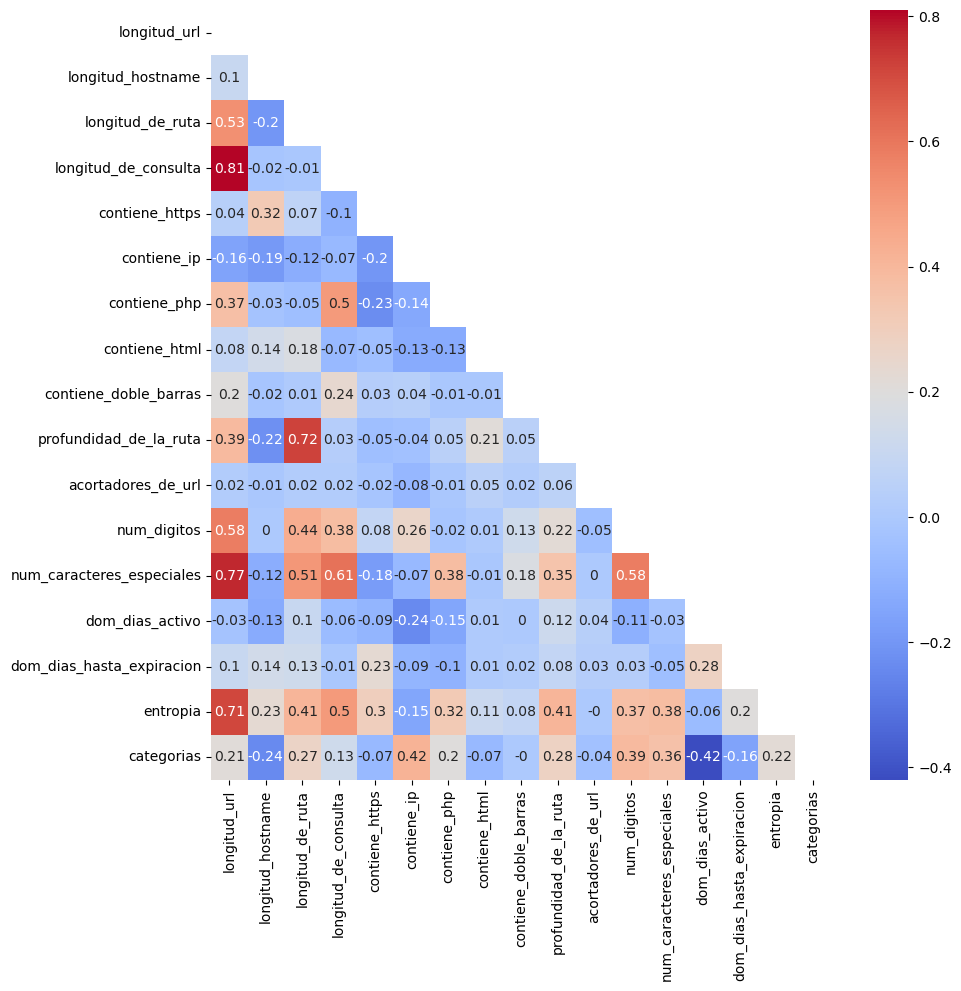

In [8]:
map_corr = df_copy.corr()
mascara = np.triu(np.ones_like(map_corr, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(map_corr.round(2), mask=mascara, annot=True, cmap="coolwarm")
plt.xticks(rotation=90, ha='center')  
plt.show()